In [1]:
%pip install musescore
%pip install music21

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
from music21 import converter, corpus, note, stream
from music21 import *

In [10]:
from music21 import environment
# Set the path to MuseScore
env = environment.Environment()
env['musicxmlPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'
env['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'

In [ ]:
midi = "bach/bach_847.mid"
midi

## I-R Symbol Assignment

In [46]:
def get_all_notes_and_chords(score):
    notes = []
    # TODO: Also take into account rests
    for part in score.parts:
        for element in part.flatten():
            if isinstance(element, note.Note):
                notes.append(element)
            # TODO: Get root note of chord only?
            elif isinstance(element, chord.Chord):
                for n in element.notes:
                    notes.append(n)
    return notes

def get_notes_with_details(score):
    note_details = []
    for part in score.parts:
        for element in part.flatten().notes:  # 'notes' includes both Note and Chord objects
            if isinstance(element, note.Note):
                note_details.append((element, element.offset, element.measureNumber))
            elif isinstance(element, chord.Chord):
                for n in element.notes:
                    note_details.append((n, element.offset, element.measureNumber))
    return note_details

In [44]:

def calculate_ir_symbol(interval1, interval2):
    direction = interval1 * interval2
    abs_difference = abs(interval2-interval1)
    # Process
    if direction > 0 and 0<(abs(interval2-interval1))<6:
        return 'P'  
    # IR2: D (Duplication)
    elif interval1 - interval2 == 0:
        return 'D' 
    # IR3: IP (Intervallic Process)
    elif ((interval1 * interval2)<0) and (-6 < (abs(interval2) - abs(interval1)) < 6) and (interval2 != interval1):
        return 'IP' 
    # IR4: ID (Intervallic Duplication)
    elif ((interval1 * interval2) < 0) and (abs(interval2) == abs(interval1)):
        return 'ID'   
    # IR5: VP (Vector Process)
    elif (interval1 * interval2 > 0) and (abs(interval2-interval1) > 6) and (abs(interval1) < 6):
        return 'VP'
    # IR6: R (Reveral)
    elif (interval1 * interval2 < 0) and (abs(abs(interval2)-abs(interval1)) > 6) and (abs(interval1) > 6):
        return 'R'
    # IR7: IR (Intervallic Reveral)
    elif (interval1 * interval2 > 0) and (abs(abs(interval2)-abs(interval1)) > 6) and (abs(interval1) > 6):
        return 'IR' 
    # IR8: VR (Vector Reveral)
    elif (interval1 * interval2 < 0) and (abs(interval2 - interval1) > 6) and (abs(interval1) < 6):
        return 'VR'       

In [45]:
def assign_ir_symbols(elements):
    symbols = []
    current_group = []

    def evaluate_current_group():
        if len(current_group) == 3:
            interval1 = current_group[1].pitch.ps - current_group[0].pitch.ps
            interval2 = current_group[2].pitch.ps - current_group[1].pitch.ps
            symbol = calculate_ir_symbol(interval1, interval2)
            symbols.append(symbol)
        elif len(current_group) == 2:
            symbols.append('D')  # Dyad
        elif len(current_group) == 1:
            symbols.append('M')  # Monad
        else:
            symbols.append('Error: Invalid note object')
        current_group.clear()

    for element in elements:
        if isinstance(element, note.Note):
            current_group.append(element)
            if len(current_group) == 3:
                evaluate_current_group()
        else:
            if current_group:
                evaluate_current_group()

    # Handle any remaining notes
    if current_group:
        evaluate_current_group()

    return symbols

In [ ]:
elements = [
    note.Note('C4'), note.Note('E4'), note.Rest(),
    note.Note('G4'), note.Note('D4'), note.Note('F4'),
    note.Rest(), note.Note('A4'), note.Note('C5'),
    note.Note('E5')
]

symbols = assign_ir_symbols(elements)
print(symbols)


In [47]:
score = converter.parse('bach/cs1-1pre.mid')
part = score.parts[0]

In [48]:
notesss = get_all_notes_and_chords(score)
notesss

[<music21.note.Note G>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note G>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note G>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note G>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note G>,
 <music21.note.Note F#>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note F#>,
 <music21.note.Note C>,
 <music21.note.Note F#>,
 <music21.note.Note G>,
 <music21.not

In [53]:
IRRRRRR = assign_ir_symbols(notesss)
IRRRRRR

['P',
 'VR',
 'P',
 'R',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'VR',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IR',
 'IP',
 'VP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'VR',
 'P',
 'P',
 'P',
 'R',
 'R',
 'D',
 'D',
 'IP',
 'IP',
 'P',
 'P',
 'IP',
 'IP',
 'IP',
 None,
 'IP',
 'P',
 'P',
 'P',
 'IP',
 'P',
 'P',
 'IP',
 'IP',
 'D',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'P',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'IP',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'IP',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'IP',
 'P',
 'IP',
 'D',
 'P',
 'P',
 'VR',
 'P',
 'P',
 'P',
 'IP',
 'VR',
 'P',
 'IP',
 'R',
 'D',
 'D',
 'P',
 'P',
 'R',
 'D',
 'P',
 'IP',
 'P',
 'IP',
 'P',
 'P',
 'D',
 None,
 None,
 'P',
 'IP',
 'IP',
 'P',
 'IP',
 'P',
 'P',
 'VR',
 'P',
 'D',
 'IP',
 None,
 'IP',
 'P',
 None,
 'D',
 'D',
 'P',
 'IP',
 'IP',
 'IP',
 'IP',
 'D',
 'D',
 'P',
 'P',
 'R',


In [59]:
type(IRRRRRR)
len(IRRRRRR)

219

## Markov Chain Making

In [57]:
import numpy as np

# Example list of labels
labels = IRRRRRR

# Step 1: Identify unique states
states = list(set(labels))

# Step 2: Create a transition matrix
transition_matrix = np.zeros(10, 10) # Always 10 (P, D, IP, ID, VP, R, IR, VR, M, D)

# Create a mapping of states to indices for easier matrix manipulation
state_index = {state: i for i, state in enumerate(states)}

# Step 3: Count transitions
for (current, next) in zip(labels[:-1], labels[1:]):
    transition_matrix[state_index[current]][state_index[next]] += 1

# Step 4: Normalize the transition matrix to get probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1)[:, None]

# Display the transition matrix
print("States:", states)
print("Transition Matrix:\n", transition_matrix)


States: ['IR', None, 'P', 'IP', 'D', 'VR', 'VP', 'R']
Transition Matrix:
 [[0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.16666667 0.16666667 0.33333333 0.33333333 0.
  0.         0.        ]
 [0.         0.01785714 0.28571429 0.44642857 0.07142857 0.08928571
  0.         0.08928571]
 [0.01010101 0.02020202 0.23232323 0.65656566 0.04040404 0.02020202
  0.01010101 0.01010101]
 [0.         0.05128205 0.12820513 0.07692308 0.69230769 0.05128205
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.14285714 0.28571429 0.42857143 0.
  0.         0.14285714]]


# IGNORE AFTER THIS PART

In [8]:
score = converter.parse(midi)

In [9]:
score.parts

<music21.stream.iterator.StreamIterator for Score:0x2833b2aac10 @:0>

In [10]:
detect_closures(score)

[]

In [11]:
assign_ir_symbols(score)

AttributeError: 'Part' object has no attribute 'pitch'

In [12]:
from music21 import converter

# Load the score
score = converter.parse(midi)  # Replace with your file path

# Iterate over all parts in the score
for part in score.parts:
    print(f"Inspecting part: {part.id}")
    # Iterate over all measures in each part
    for measure in part.getElementsByClass('Measure'):
        print(f"Measure {measure.number}:")
        # Iterate over all notes in the measure
        for note in measure.notes:
            # Here we print some attributes of each note
            print(f"Note: {note.nameWithOctave}, Duration: {note.duration.quarterLength}, Offset: {note.offset}")
            if note.lyrics:
                # Print lyrics if the note has any
                print(f"    Lyrics: {' '.join(lyric.text for lyric in note.lyrics)}")


Inspecting part: 2762658385616
Measure 1:


AttributeError: 'Chord' object has no attribute 'nameWithOctave'

In [13]:
from music21 import converter, note, chord, stream


In [14]:
from music21 import environment
# Set the path to MuseScore
env = environment.Environment()
env['musicxmlPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'
env['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'


0 2195067343888
1 2194999715472
2 2195066344592


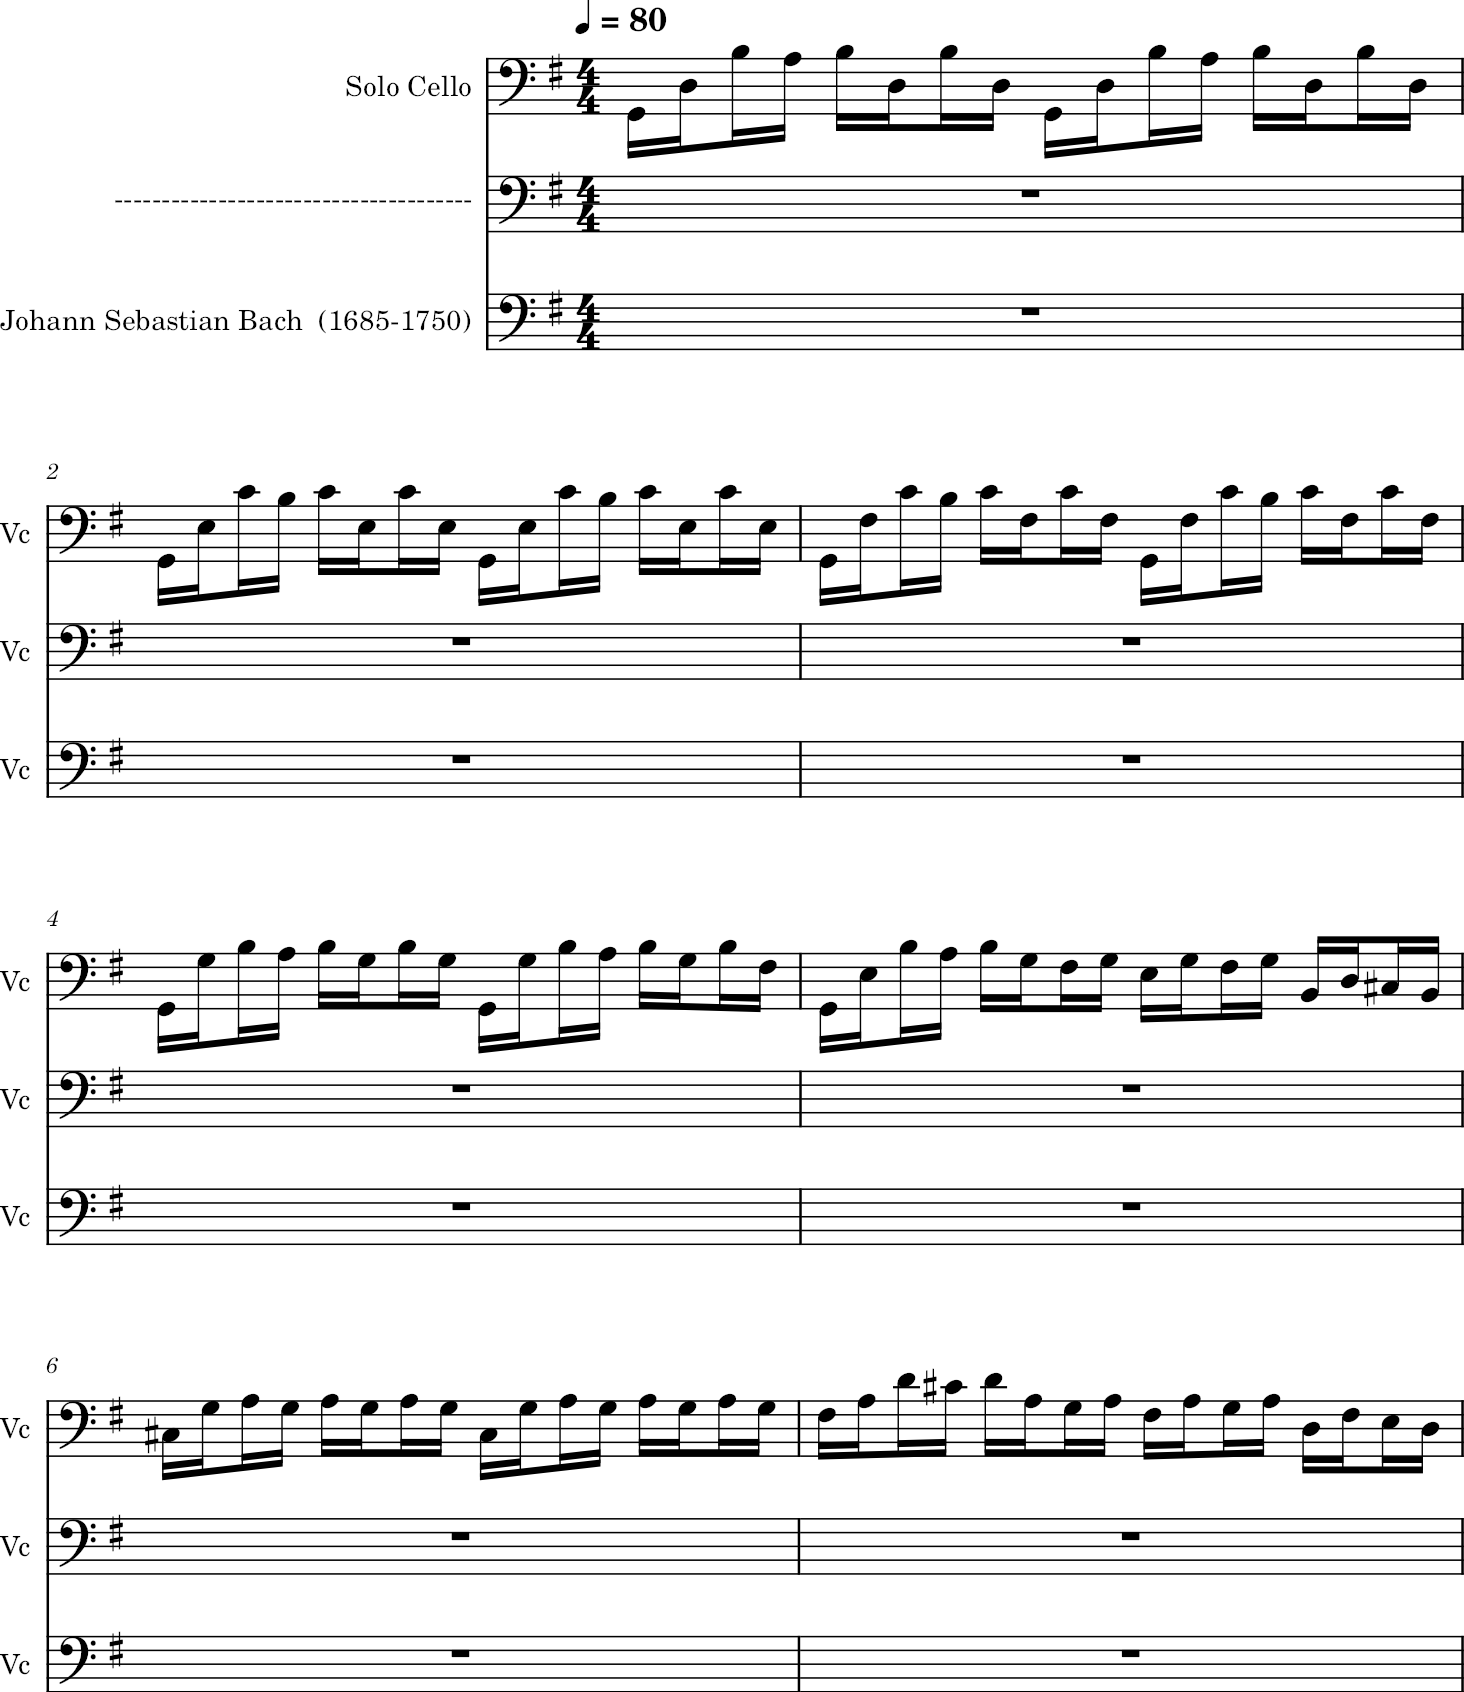

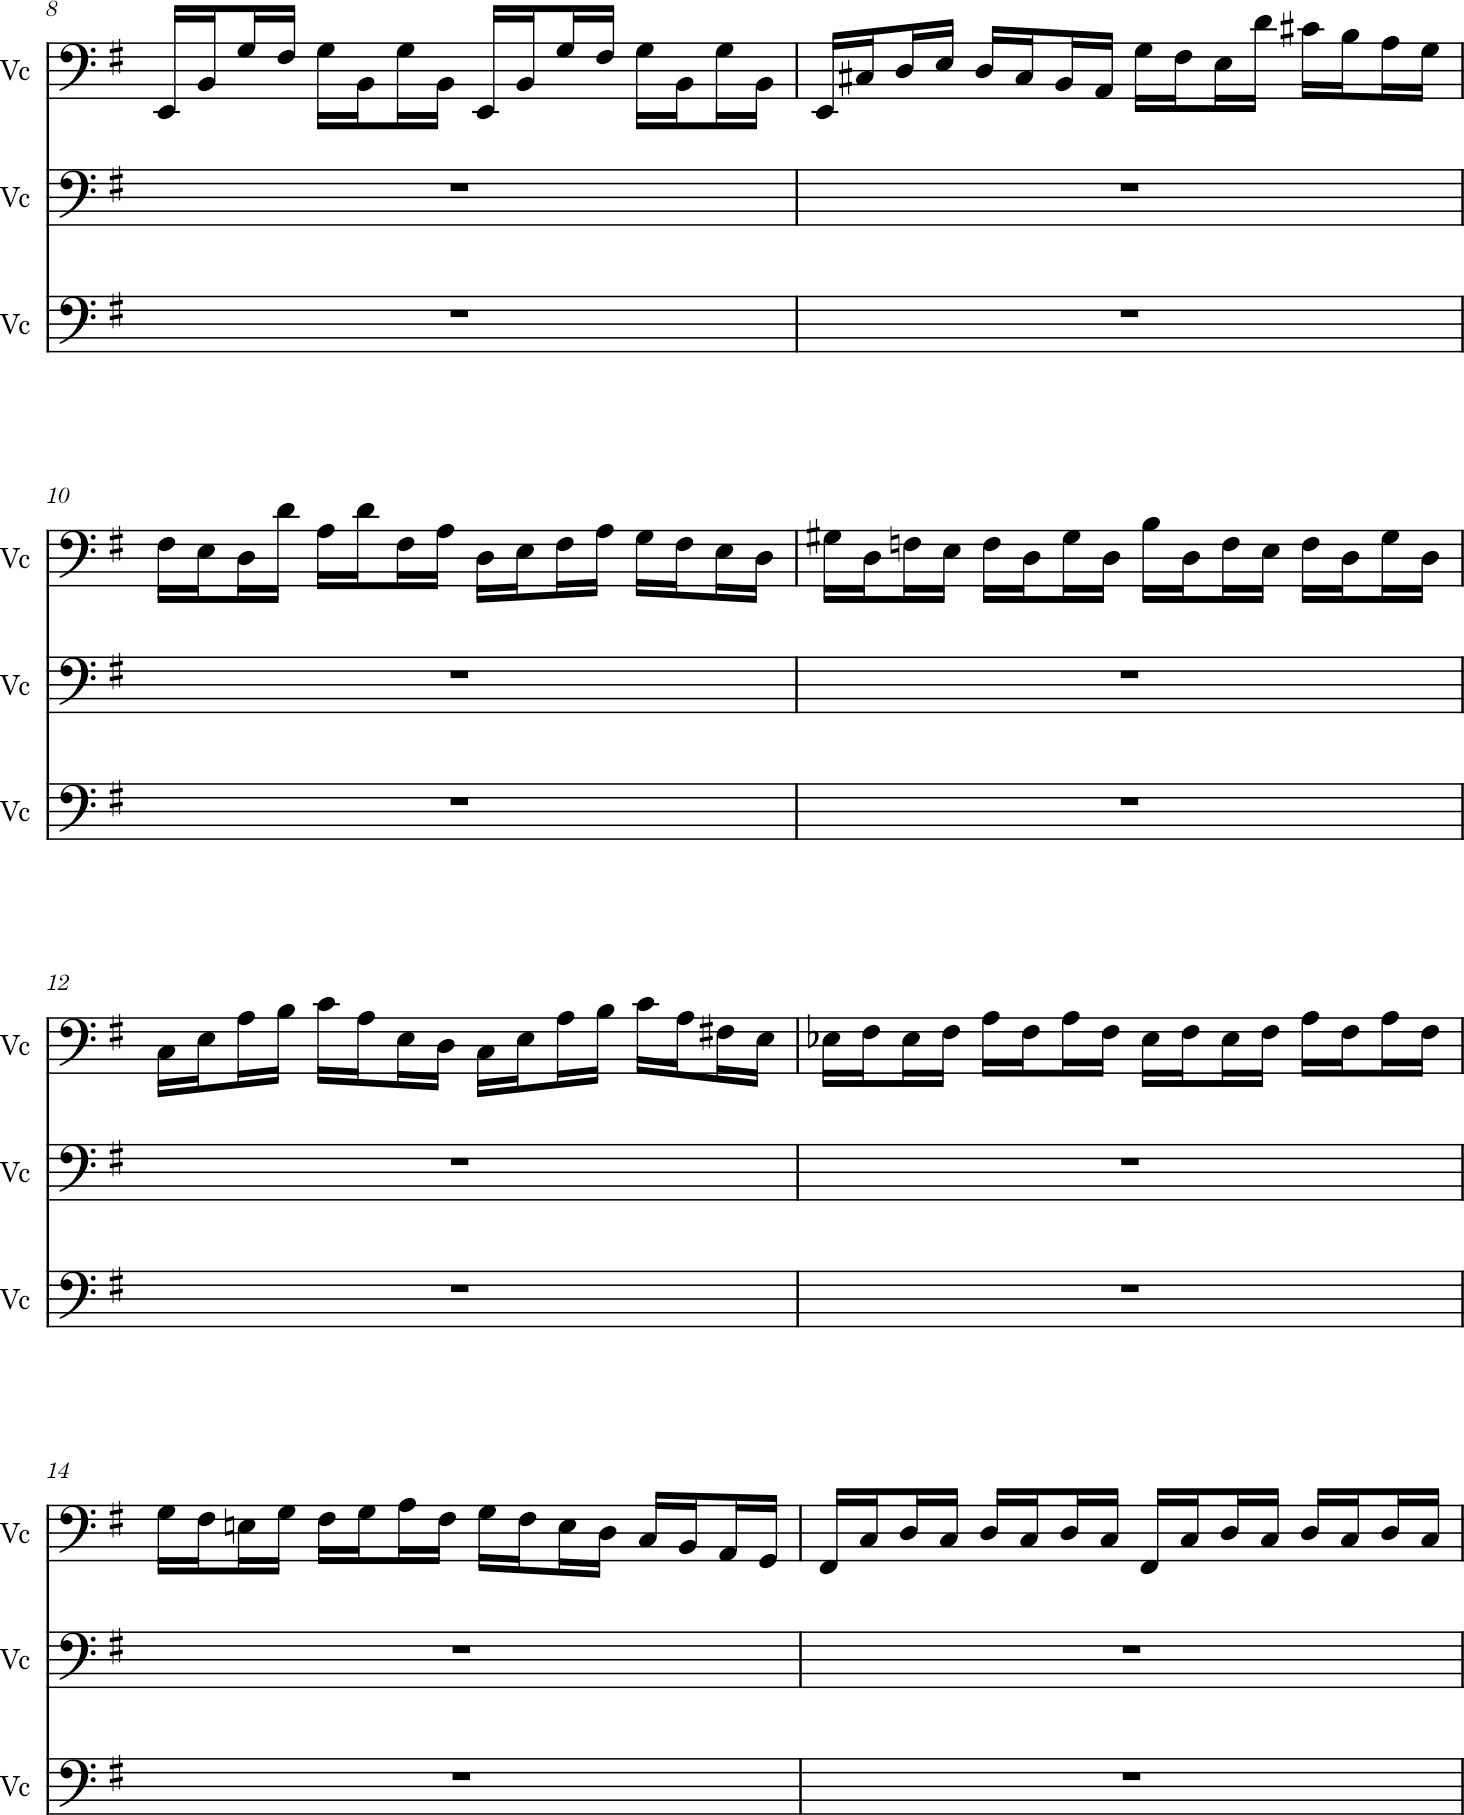

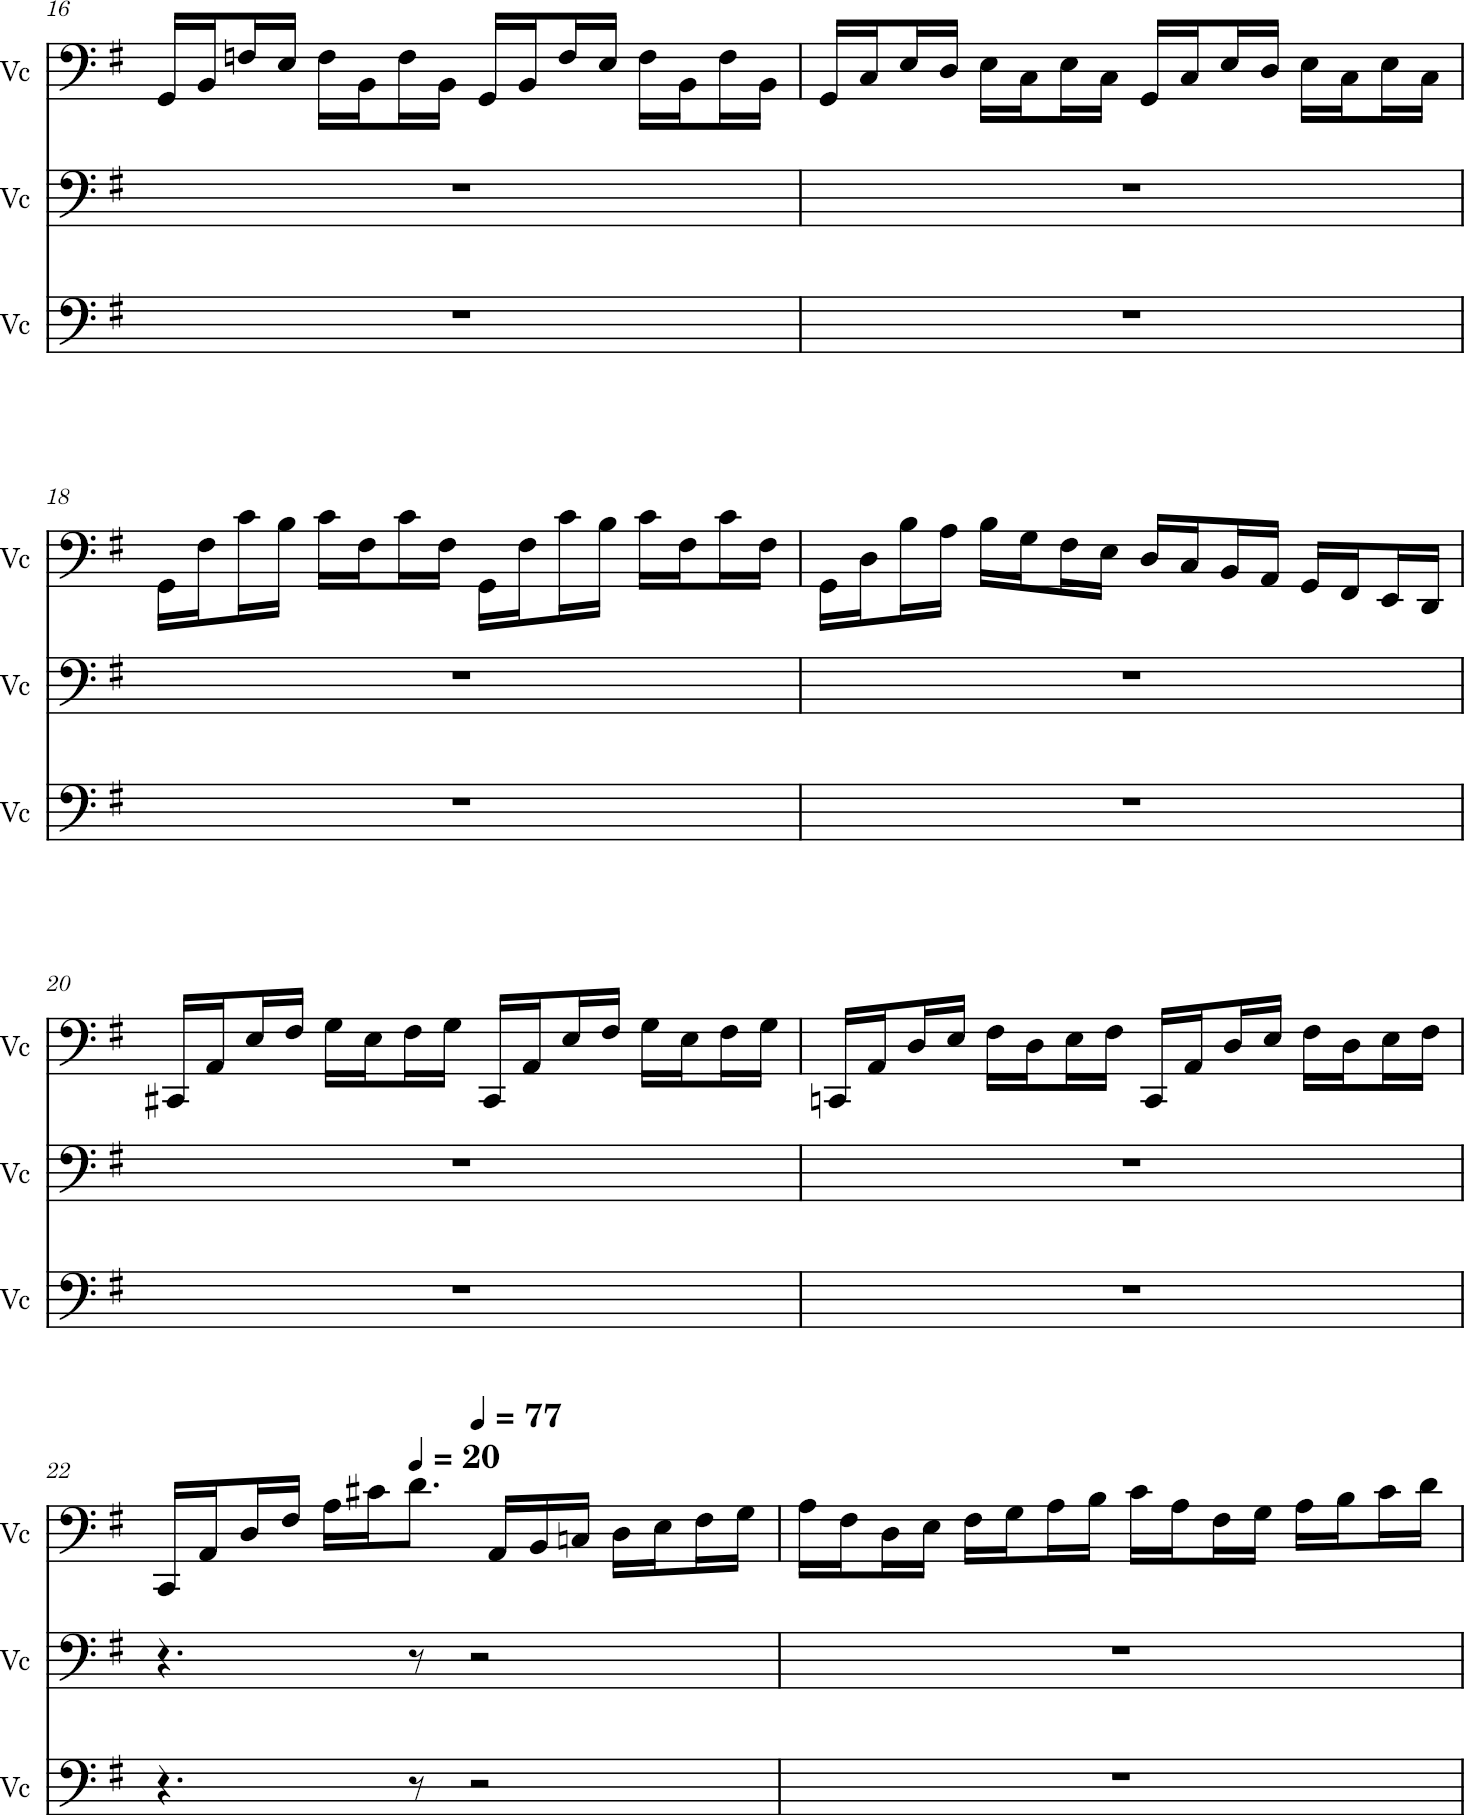

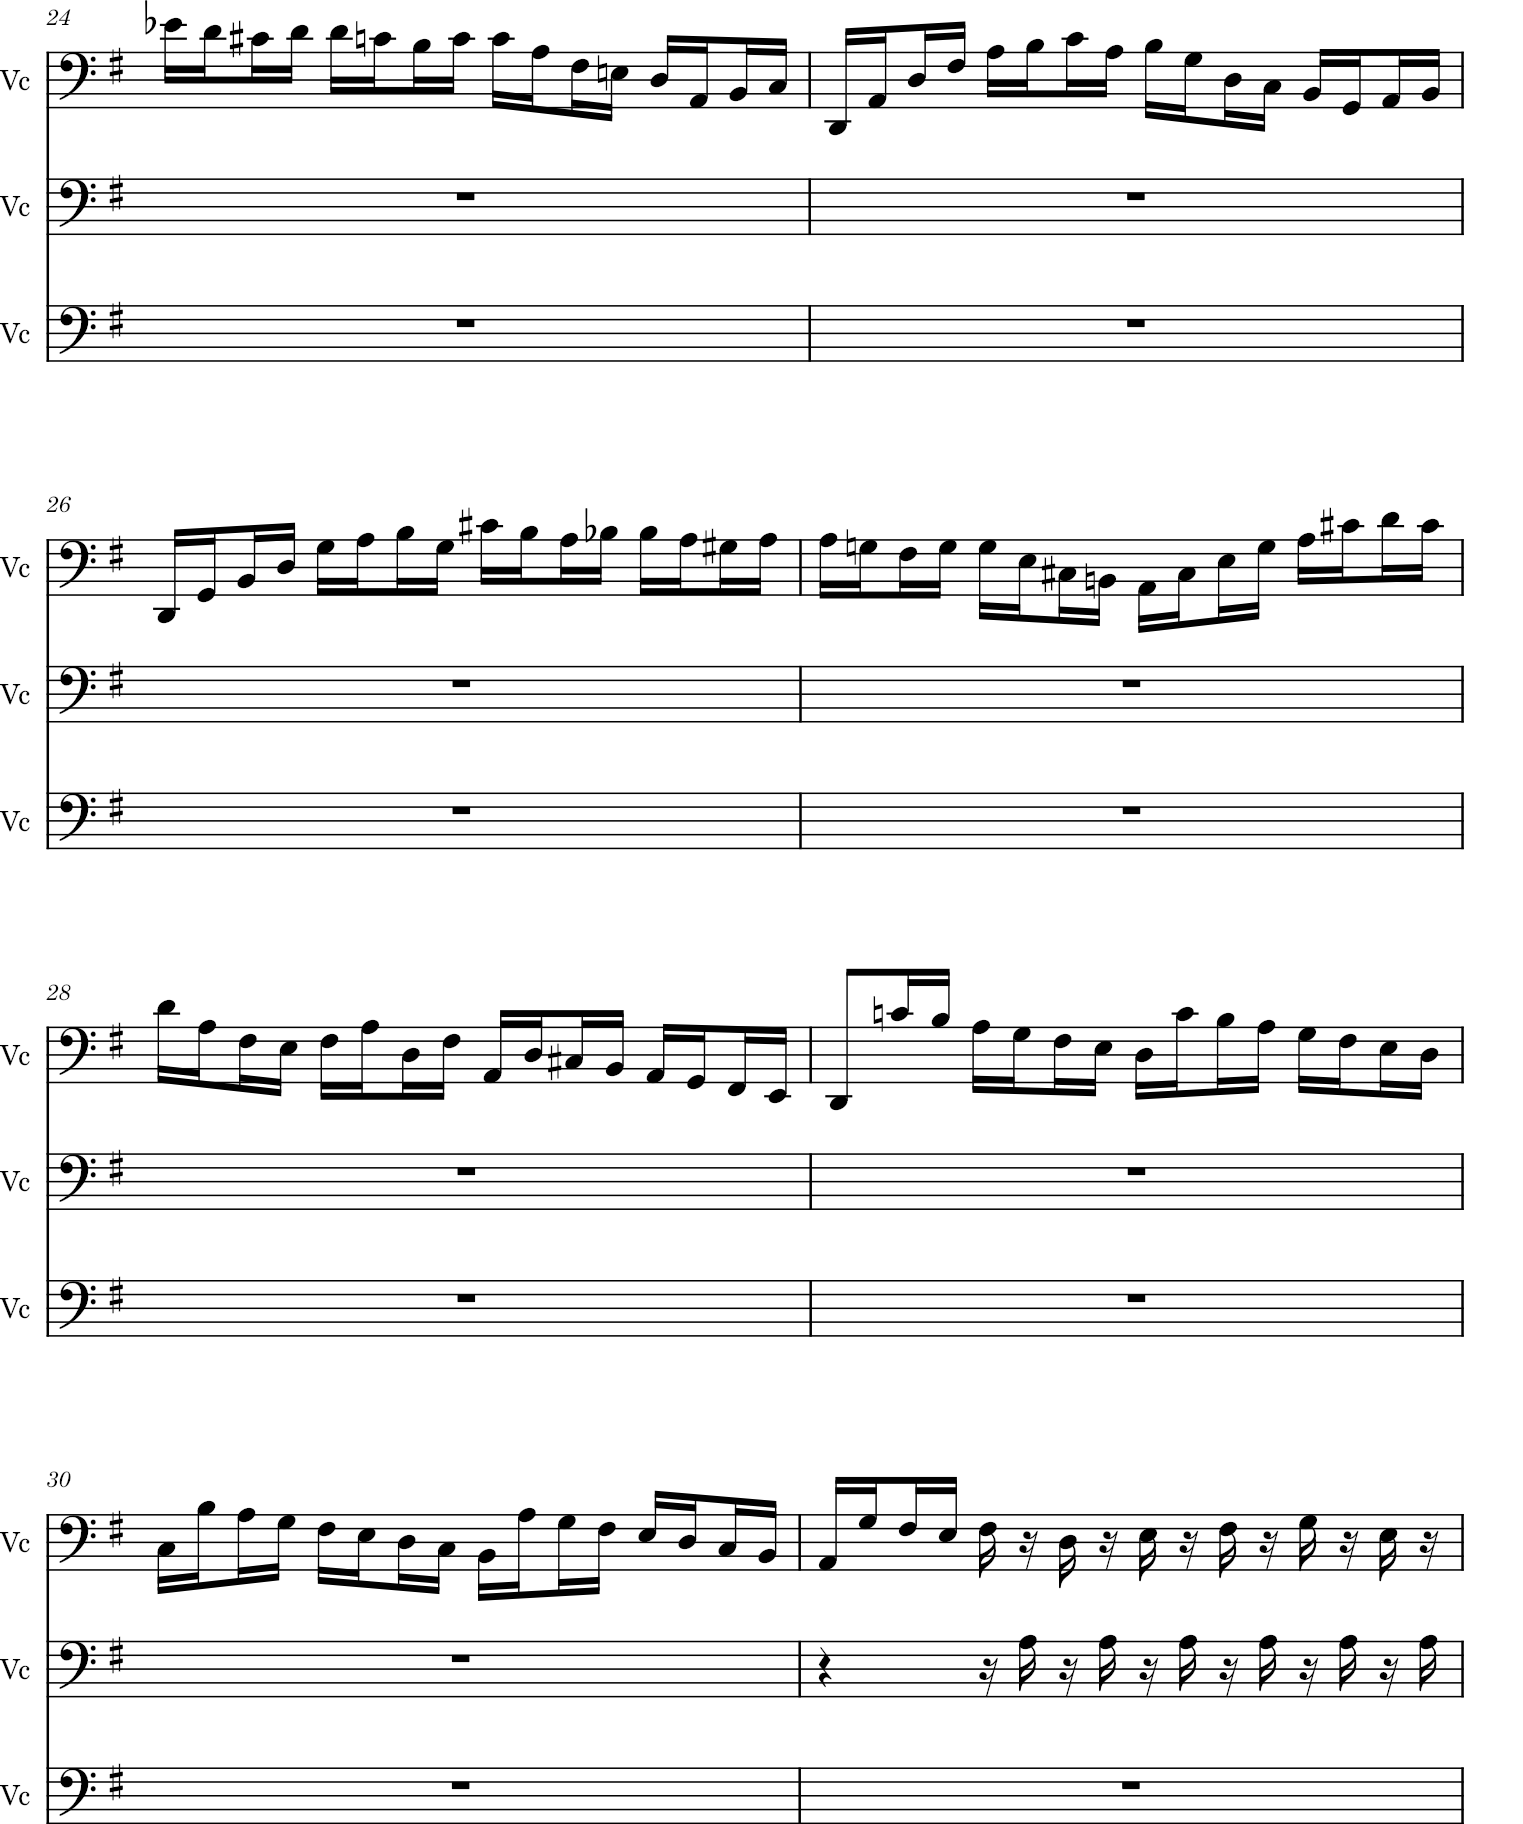

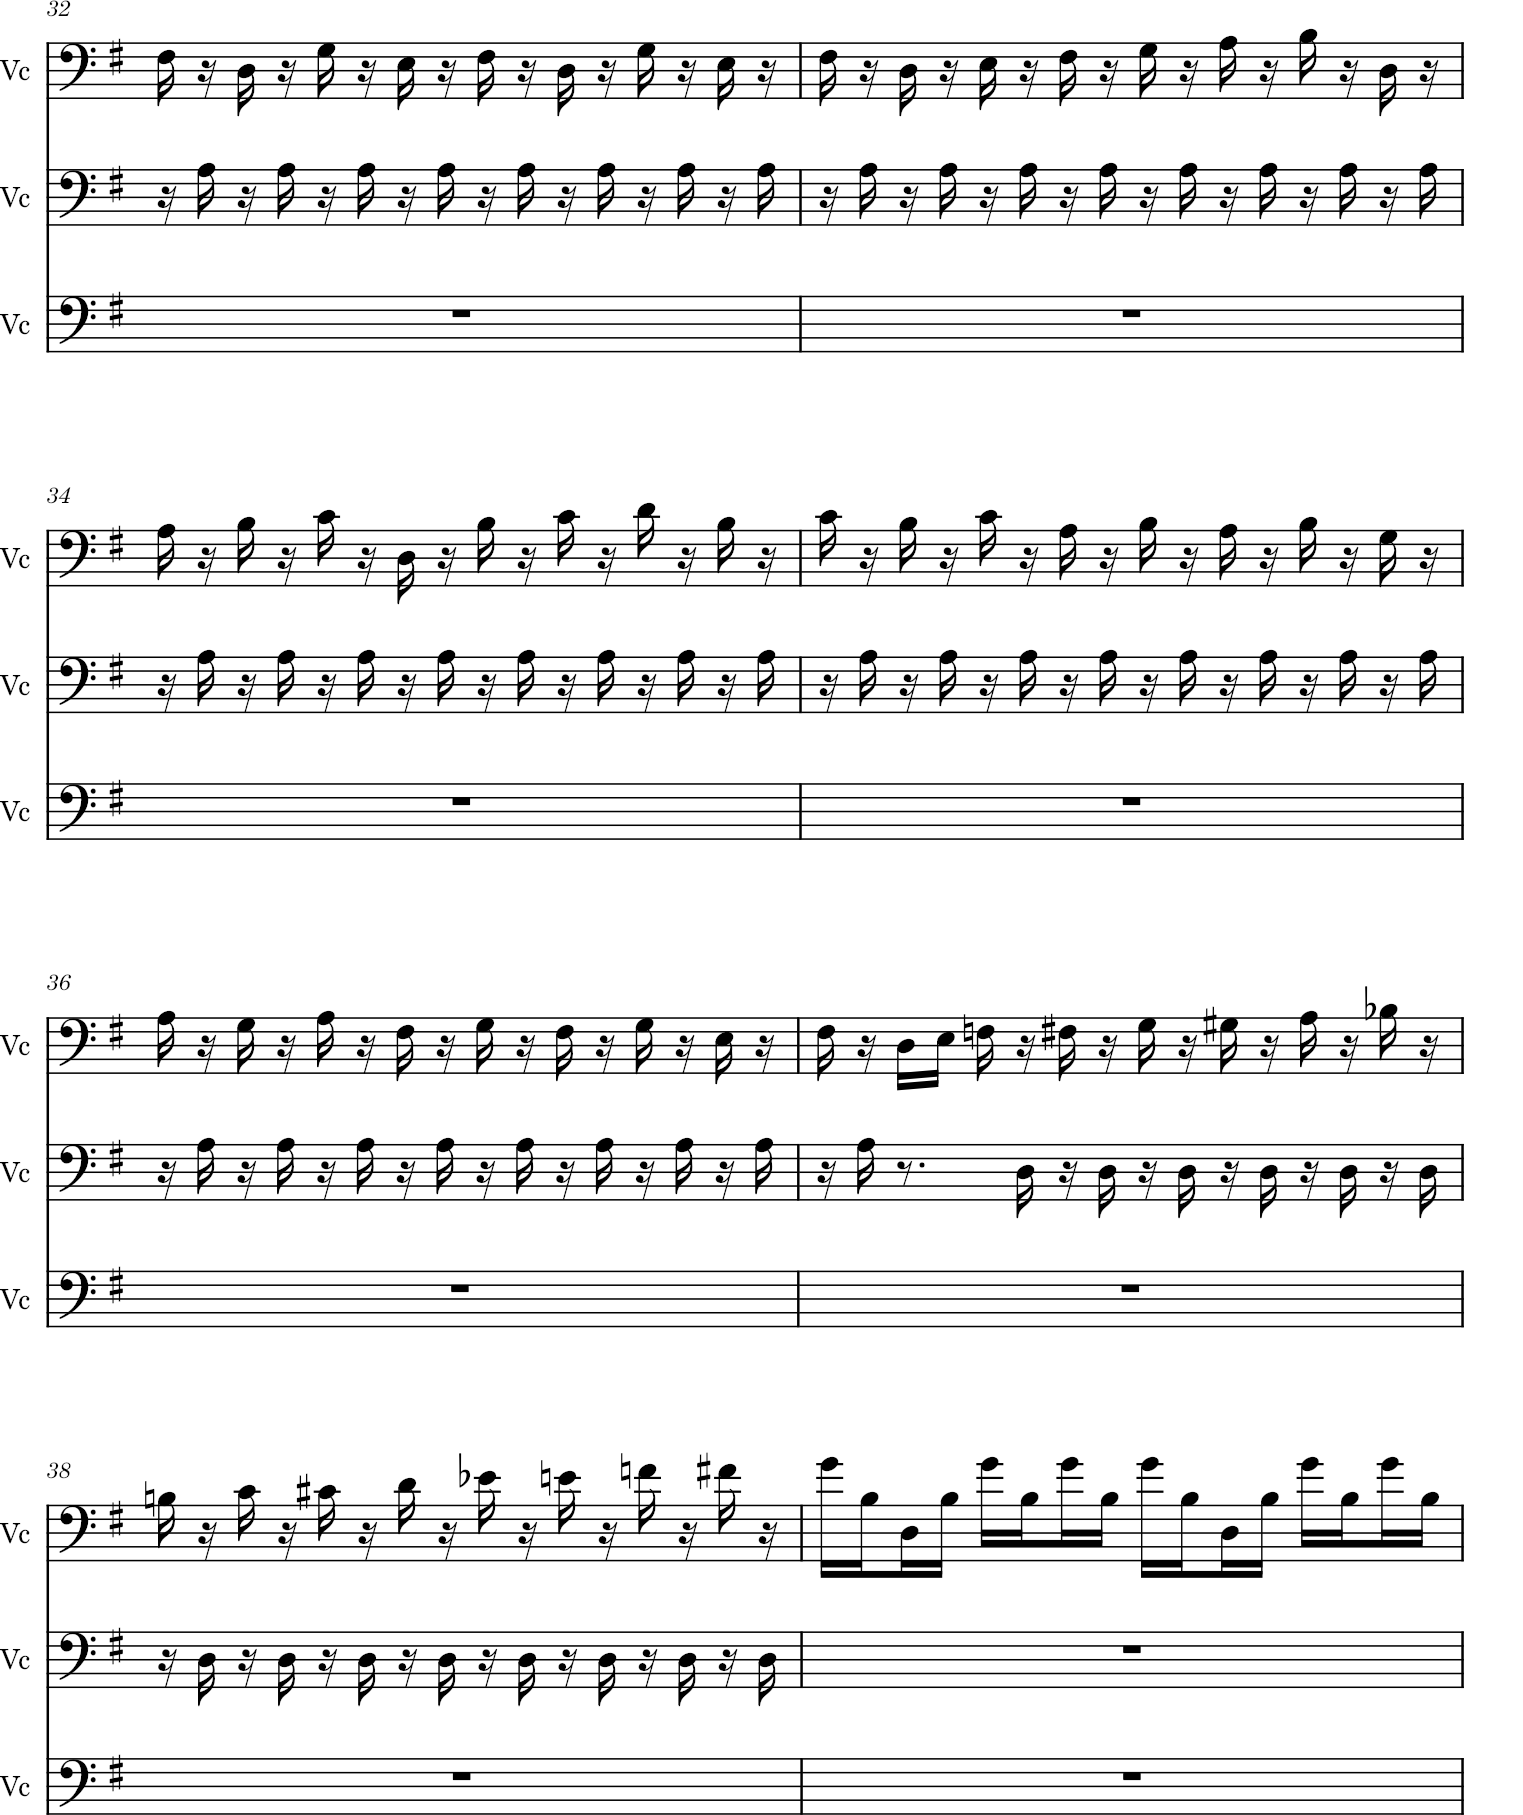

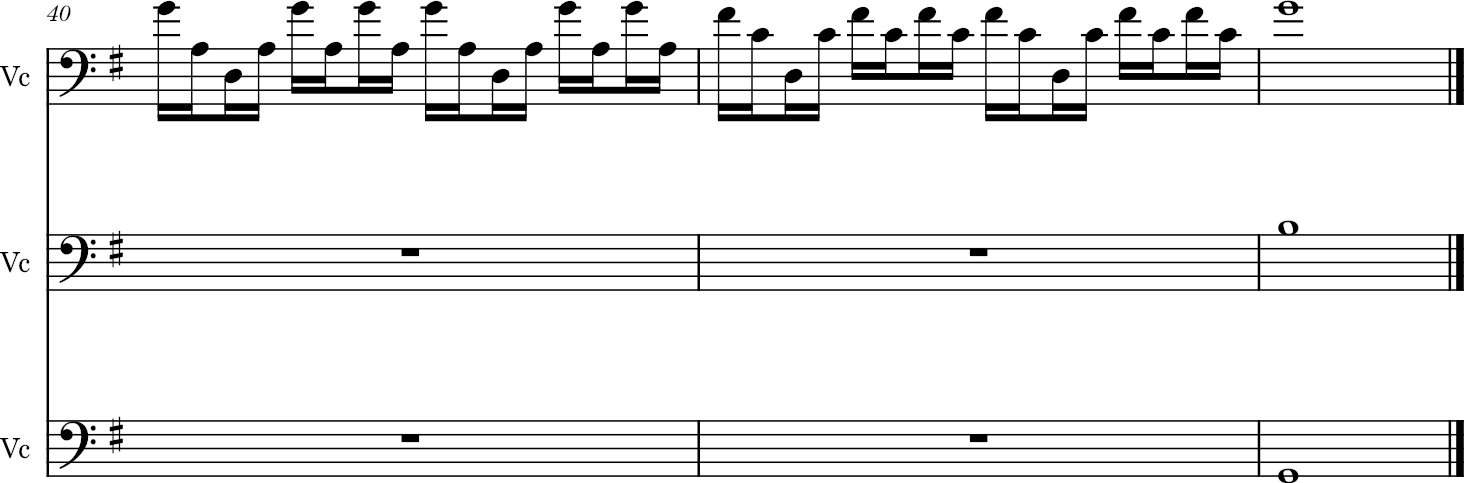

In [55]:
# Load the MIDI file
score = converter.parse('bach/cs1-1pre.mid')
for idx, part in enumerate(score.parts):
    print(idx, part.id)
part = score.parts[0]
score.show()

In [16]:
def calculate_iois(score):
    iois = []
    previous_offset = None

    # Use .flatten() instead of .flat
    for elem in score.flatten().notesAndRests:
        if previous_offset is not None:
            ioi = elem.offset - previous_offset
            iois.append(ioi)
        previous_offset = elem.offset
    
    return iois


In [30]:
def detect_closures(iois, threshold=1.5):
    closures = []
    for i in range(1, len(iois)):
        #if abs(iois[i] > iois[i-1]) > 2:
        if iois[i] > iois[i-1] * threshold:
            closures.append(i)  # Index of the note after the long IOI
    return closures


In [18]:
def highlight_closures(score, closures):
    highlighted = stream.Score()
    index = 0
    for elem in score.flatten().notesAndRests:
        new_element = elem
        if isinstance(elem, note.Note):
            new_element = note.Note(elem.pitch, quarterLength=elem.duration.quarterLength)
        elif isinstance(elem, chord.Chord):
            new_element = chord.Chord(elem.pitches, quarterLength=elem.duration.quarterLength)
        
        if index in closures:
            new_element.style.color = 'red'  # Highlight in red
        highlighted.append(new_element)
        index += 1
    return highlighted


In [ ]:
iois = calculate_iois(part)
iois

In [ ]:
closures = detect_closures(iois)
highlighted_score = highlight_closures(part, closures)
highlighted_score.show()


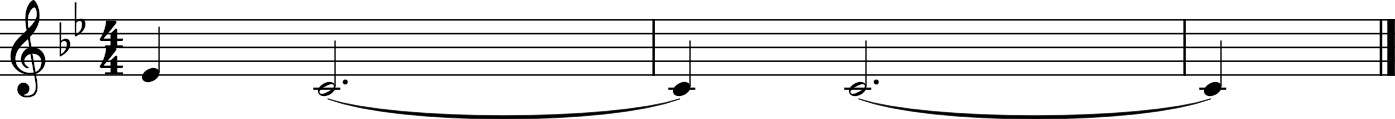

In [29]:

# Create a stream for the piece
s = stream.Stream()

# Set the time signature
s.timeSignature = meter.TimeSignature('4/4')

# Set the key signature
s.keySignature = key.KeySignature(-2) # Bb major

# Add a whole note 'C4'
n1 = note.Note('C4', duration=duration.Duration(type='whole'))
n3 = note.Note('C4', duration=duration.Duration(type='whole'))

# Add a quarter note 'E-4'
n2 = note.Note('E-4', duration=duration.Duration(type='quarter'))
n4 = note.Note('E-4', duration=duration.Duration(type='quarter'))
rest = note.Rest

# Add triplet eighth notes 'F4', 'G4', 'A4'
# tuplet_notes = ['F4', 'G4', 'A4']
# for pitch in tuplet_notes:
#     n = note.Note(pitch, duration=duration.Duration(type='eighth'))
#     tup = duration.Tuplet(numberNotesActual=3, numberNotesNormal=2)
#     n.duration.appendTuplet(tup)
#     s.append(n)

# Add the notes to the stream
s.append(n4)
s.append(n1)
s.append(n3)


# Show the music
s.show()


In [31]:
iois = calculate_iois(s)
iois

[1.0, 4.0]

In [32]:
closures = detect_closures(iois)
closures

[1]

C:\Users\oyutn\AppData\Roaming\Python\Python311\site-packages\music21\musicxml\m21ToXml.py:531: MusicXMLWarning: <music21.stream.Score 0x2833ec4d4d0> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{sc} is not well-formed; see isWellFormedNotation()',


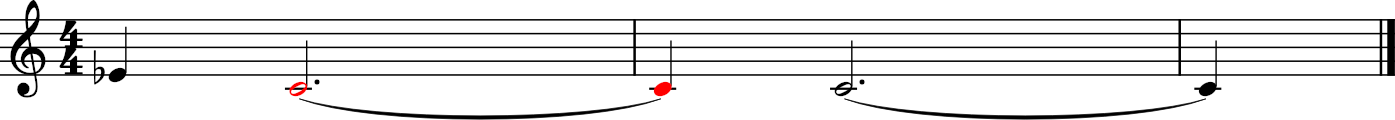

In [33]:
highlighted_score = highlight_closures(s, closures)
highlighted_score.show()